In [1]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2020-05-10 01:38:18--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-05-10 01:38:18--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-05-10 01:38:20--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-05-10 01:38:21--  https://www.dropbox.com/s/raw/7

In [2]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_

In [0]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


CNN PART


In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

# Train From Scratch

In [0]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [8]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [11]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 12s 2s/step - loss: 0.7103 - accuracy: 0.5117 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 8s 1s/step - loss: 0.6226 - accuracy: 0.6562 - val_loss: 0.5476 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.4455 - accuracy: 0.7812 - val_loss: 0.3948 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.2702 - accuracy: 0.8750 - val_loss: 0.2586 - val_accuracy: 0.9167
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.2384 - accuracy: 0.9180 - val_loss: 0.1558 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.2273 - accuracy: 0.9414 - val_loss: 0.2096 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.1940 - accuracy: 0.9492 - val_loss: 0.1861 - val_accuracy: 0.9833
Epoch 8/10
8/8 [=======================

# Loss us very less and accuracy is on point

In [0]:
model.save("model_Covid_19.h5")

In [13]:
model.evaluate_generator(train_generator)

[0.042939282953739166, 0.96875]

In [14]:
model.evaluate_generator(validation_generator)

[0.09149589389562607, 0.9833333492279053]

# Test Images

In [0]:
model = load_model("model_Covid_19.h5")

In [0]:
import os

In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("./CovidDataset/Val/Normal"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("./CovidDataset/Val/Covid"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_actual,y_test)

In [0]:
import seaborn as sns

# **Confusion Matrix**

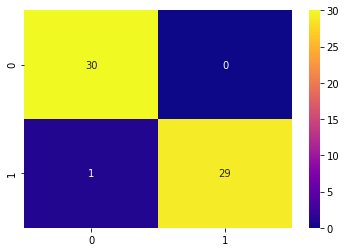

In [57]:
sns.heatmap(cm,cmap = "plasma" , annot=True)

# **Predictions from X-Ray Images**

This Xray Image is of positive covid-19 patient


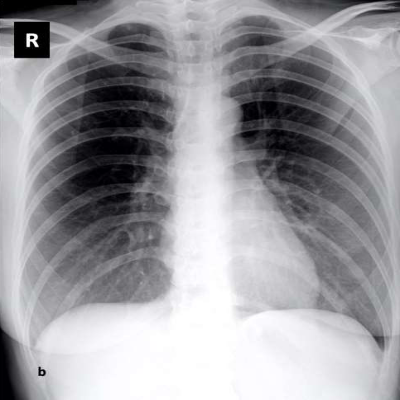

Prediction Of Our Model :  Positive For Covid-19


In [64]:
import numpy as np
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/CovidDataset/Prediction/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices
imggg = cv2.imread('/content/CovidDataset/Prediction/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png')
print("This Xray Image is of positive covid-19 patient")
imggg = cv2.resize(imggg,(400,400))
cv2_imshow(imggg)

# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

This Xray Image is of Negative covid-19 patient


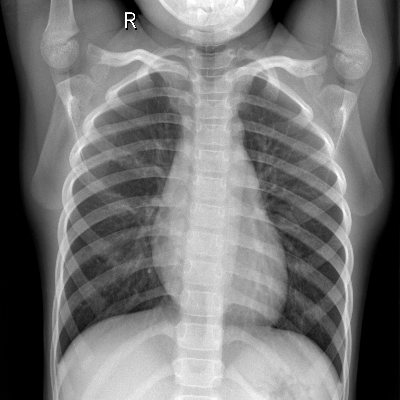

Prediction Of Our Model :  Negative for Covid-19


In [63]:
import numpy as np
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
xtest_image = image.load_img('/content/CovidDataset/Prediction/IM-0545-0001-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices
imggg = cv2.imread('/content/CovidDataset/Prediction/IM-0545-0001-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = cv2.resize(imggg,(400,400))
cv2_imshow(imggg)

# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)